In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import holidays
from datetime import date

warnings.filterwarnings('ignore')
sns.set()



In [2]:
df = pd.read_excel("ML Live Flight Fare Resourses16963295320.xlsx",parse_dates=["Date_of_Journey"])

In [5]:
df['day_name'] = df['Date_of_Journey'].dt.day_name()
df['is_weekend'] = df['Date_of_Journey'].dt.day_name().apply(lambda a: 'Weekend' if a in ['Friday', 'Saturday', 'Sunday'] else 'Weekday')

In [73]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,day_name,is_weekend,is_holiday,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,Sunday,1,False,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,Wednesday,0,True,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,Sunday,1,True,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,Sunday,1,False,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,Friday,1,False,1,3,16,50,21,35,4,45


In [7]:
def is_holiday(check_date, country_code='IND'):
    holiday_list = holidays.CountryHoliday(country_code)
    return check_date in holiday_list

df['is_holiday'] = df['Date_of_Journey'].apply(lambda x: is_holiday(x))

In [9]:
pd.set_option('display.max_columns', None)

In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
day_name           0
is_weekend         0
is_holiday         0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [15]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [19]:
df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [21]:
df.drop(["Route"], axis=1, inplace=True)

In [23]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [25]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis=1, inplace=True)

In [27]:
df.drop(["Additional_Info"], axis=1, inplace=True)

In [28]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [64]:
duration = list(df["Duration"])

In [65]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

In [67]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))
    duration_mins.append(int(duration[i].split("m")[0].split()[-1])) 

In [68]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [70]:
df.drop(["Duration"], axis=1, inplace=True)

In [72]:
df.replace({"Weekday": 0, "Weekend": 1}, inplace = True)

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [76]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

In [77]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

In [78]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

In [79]:
df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [90]:
df.shape

(10682, 38)

In [81]:
df.drop(["Airline","Source","Destination"], axis=1, inplace=True)

In [83]:
Day_name = df[["day_name"]]
Day_name = pd.get_dummies(Day_name, drop_first= True)

In [85]:
df = pd.concat([df, Day_name], axis = 1)

In [87]:
df.drop(["day_name"], axis=1, inplace=True)

In [91]:
X = df.drop('Price',axis=1)
y = df.Price

In [93]:
X.head()

,Total_Stops,is_weekend,is_holiday,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,1,False,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
1,2,0,True,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2,2,1,True,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False
3,1,1,False,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,1,1,False,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [94]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [96]:
print(selection.feature_importances_)

[2.15657096e-01 1.04376746e-02 7.14667690e-03 9.66928351e-02
 4.38167163e-02 2.46475064e-02 2.10819781e-02 2.79532105e-02
 1.92304212e-02 1.48109321e-01 1.73462288e-02 9.52414523e-03
 1.89047538e-03 2.13826989e-02 1.29202257e-01 6.71367793e-02
 1.66636546e-02 8.80445379e-04 2.96258023e-03 9.96710641e-05
 4.48560035e-03 7.46047534e-05 4.54523574e-04 8.41097112e-03
 3.34037998e-03 6.12100218e-03 1.36696543e-02 1.27593220e-02
 5.61418252e-03 4.70989206e-04 2.47100763e-02 5.57906275e-03
 4.72764087e-03 1.13719036e-02 4.68856268e-03 2.53064892e-03
 9.12850207e-03]


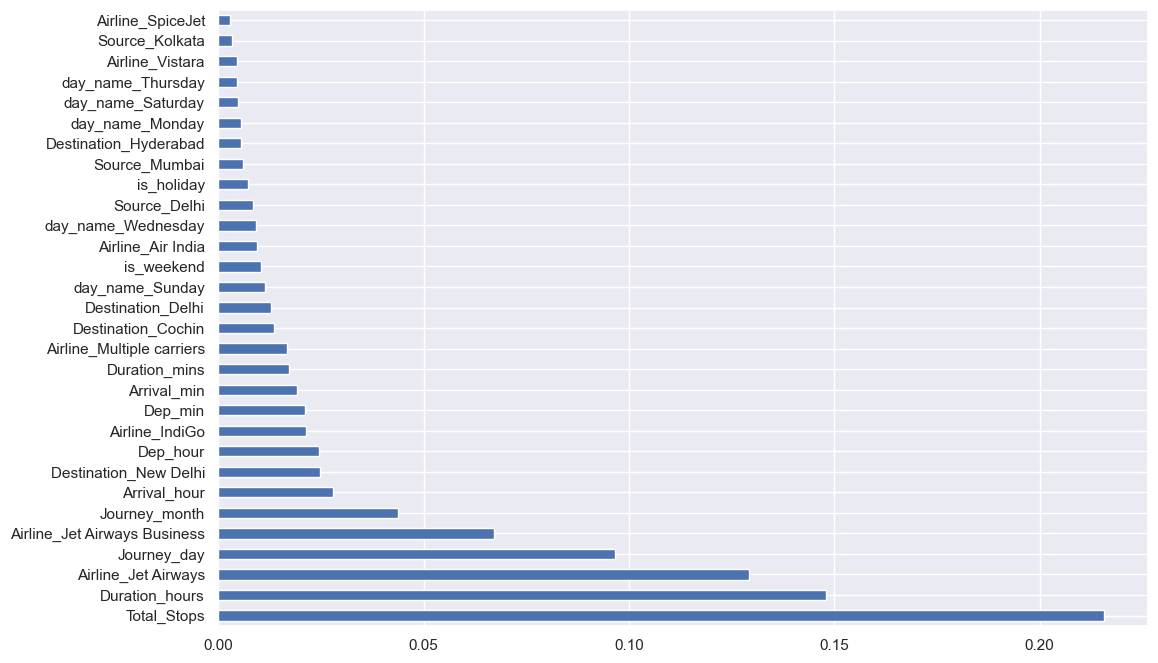

In [105]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# linear regrassion

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

LinearRegression()

In [101]:
linearModel.score(X_train, y_train)

0.6334013847612644

In [103]:
linearModel.score(X_test, y_test)

0.6624877157405769

# trying diffrent algorithms

In [107]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [109]:
model = [LinearRegression, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, SVR, XGBRFRegressor]
for mod in model:
    reg = mod()
    reg = reg.fit(X_train, y_train)
    print(mod, "Accuracy", reg.score(X_test, y_test))

<class 'sklearn.linear_model._base.LinearRegression'> Accuracy 0.6624877157405769
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> Accuracy 0.5768835336333633
<class 'sklearn.tree._classes.DecisionTreeRegressor'> Accuracy 0.7174777574221639
<class 'sklearn.ensemble._forest.RandomForestRegressor'> Accuracy 0.8192745411574317
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> Accuracy 0.3806264111476233
<class 'sklearn.svm._classes.SVR'> Accuracy -0.004628704275459361
<class 'xgboost.sklearn.XGBRFRegressor'> Accuracy 0.7524282699758582


# Tunig of Parameters


In [113]:
from sklearn.model_selection import KFold, cross_val_score

In [118]:
models = []
models.append(('linear', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('TREE', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('Adaboost', AdaBoostRegressor()))
models.append(('XGBR', XGBRFRegressor()))

results = []
names = []

for name,model in models:
    kfold = KFold(n_splits=8)
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold)
    names.append(name)
    results.append(cv_result)

for i in range(len(names)):
    print(names[i], results[i].mean())


linear 0.6236542935416708
KNN 0.5431079586070365
TREE 0.6779435398024134
RandomForest 0.7959098705046039
Adaboost 0.13875319245687867
XGBR 0.718440253670858


In [121]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [122]:
y_pred = reg_rf.predict(X_test)

In [123]:
reg_rf.score(X_train, y_train)

0.9537307237161105

In [124]:
reg_rf.score(X_test, y_test)

0.8202544108391836

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [155]:
n_estimators = list(range(100,1500,15))
max_features = ["auto","sqrt"]
max_depth = list(range(5,50,8))
min_sample_split= [2,5,10,35,90]
min_sample_leaf = [2,4,10,12]

In [156]:
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_sample_split,
    "min_samples_leaf": min_sample_leaf
}

In [140]:
n_estimators

[[100, 115, 130, 145, 160, 175, 190]]

In [157]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid,
                              n_iter=15,cv=10,
                              )

In [158]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'max_depth': [5, 13, 21, 29, 37, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 10, 12],
                                        'min_samples_split': [2, 5, 10, 35, 90],
                                        'n_estimators': [100, 115, 130, 145,
                                                         160, 175, 190, 205,
                                                         220, 235, 250, 265,
                                                         280, 295, 310, 325,
                                                         340, 355, 370, 385,
                                                         400, 415, 430, 445,
                                                         460, 475, 490, 505,
                                                         520, 535, ...]})

In [159]:
rf_random.best_params_

{'n_estimators': 520,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13}

In [161]:
rf_random.best_score_

0.7694769875973069

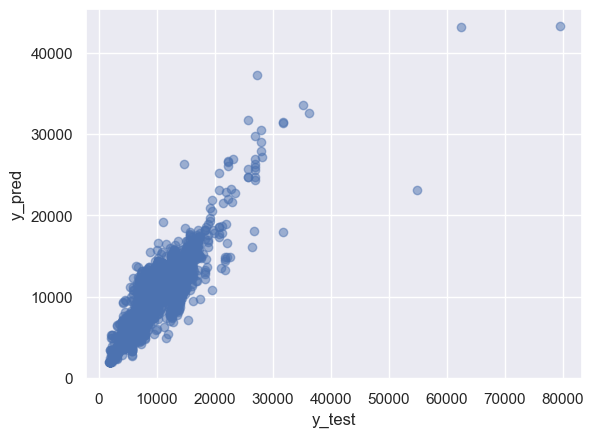

In [162]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [163]:
y_pred

array([13772.82416667,  4154.3       ,  8086.97      , ...,
        3505.93447619, 13132.49      ,  5942.7       ])

In [164]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [165]:
r2_score(y_test, y_pred)

0.8202544108391836